In [16]:
# Discussion1-Activity03
# Create the log table containing these columns and fill out the table for 1 epoch for the dataset provided in the example below:
# https://towardsdatascience.com/step-by-step-tutorial-on-linear-regression-with-stochastic-gradient-descent-1d35b088a843

import pandas as pd
# creating a dataframe for the dataset
d = {'x1': [4, 2, 1,3,1,6], 'x2': [1, 8,0, 2,4,7], 'y': [2, -14, 1, -1, -7, -8]}
df = pd.DataFrame(data=d)
df

,x1,x2,y
0,4,1,2
1,2,8,-14
2,1,0,1
3,3,2,-1
4,1,4,-7
5,6,7,-8


In [24]:
# batch size =1, so we have 6 batches altogether. 
# We complete 1 epoch when the model has iterated through all the batches once.
 
# we are reporting : x1, x2, y, y_hat, (y- y_hat), w1, w2, b  ... assuming y_hat = w1x1 + w2x2 + b
# goal: find the best w (weight) and b (bias) values using Stochastic GD. 

data= [] 
# Initializing the weights using Truncated Normal Distribution 
w_1 = -0.017
w_2 = -0.048
b=0 

# learning rate
a = 0.05
 

# the size of dataset is 6 (6 samples)
# Batch size = 1 , so we have 6 batches in 1 apoch: 
for i in range(0, 6):
    x_1 = df.loc[i][0]
    x_2 = df.loc[i][1]
    y = df.loc[i][2]
    y_hat = (w_1*x_1) + (w_2*x_2) + b
    loss = pow((y - y_hat) , 2)
    data.append([x_1, x_2, y, y_hat, loss, (y - y_hat) ,w_1,w_2,b])
    
    # updated parameters
    w_1_update = w_1 + a*(2* (y - y_hat) *x_1)
    w_2_update = w_2 + a*(2*(y - y_hat)*x_2)
    b_update = b + a*(2* (y - y_hat))
    
    w_1 = w_1_update
    w_2 = w_2_update
    b = b_update
    # end of ith batch
    
output = pd.DataFrame(data, columns=['x1', 'x2', 'y', 'y_hat', 'loss' , 'y - y_hat' , 'w1', 'w2' , 'b'])

output 


,x1,x2,y,y_hat,loss,y - y_hat,w1,w2,b
0,4,1,2,-0.116000,4.477456,2.116000,-0.017000,-0.048000,0.000000
1,2,8,-14,3.179200,295.124913,-17.179200,0.829400,0.163600,0.211600
2,1,0,1,-4.112760,26.140315,5.112760,-2.606440,-13.579760,-1.506320
3,3,2,-1,-34.440056,1118.237345,33.440056,-2.095164,-13.579760,-0.995044
4,1,4,-7,-17.281181,105.702679,10.281181,7.936853,-6.891749,2.348962
5,6,7,-8,37.711970,2089.584165,-45.711970,8.964971,-2.779276,3.377080


In [29]:
output['loss']

0       4.477456
1     295.124913
2      26.140315
3    1118.237345
4     105.702679
5    2089.584165
Name: loss, dtype: float64

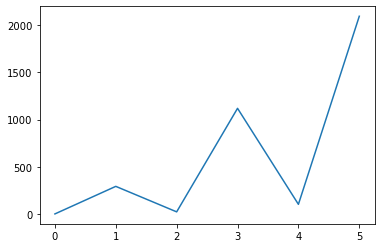

In [30]:
import matplotlib.pyplot as plt
plt.plot([0, 1, 2, 3, 4, 5],output['loss'] )

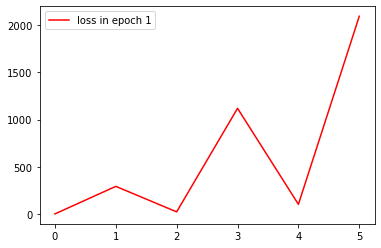

In [32]:
import matplotlib.pyplot as plt
plt.plot(output['loss'],'r-',label='loss in epoch 1')
plt.legend()
plt.show()